## TauRAMD vs UMD Unbinding


Original Contingency Table (Observed Frequencies):
     WT  UMD-UnBinding
T1  36             13
T2   2             10
T3   3              2
T4  12              4
T5   7              3
T6   1              0
T7   0              1
T8  10              8
T9   3              0

Chi-Square Test Results:
Chi2 Statistic: 19.2686
P-value: 0.0135
Degrees of Freedom: 8

Expected Frequencies:
            WT  UMD-UnBinding
T1  31.530435      17.469565
T2   7.721739       4.278261
T3   3.217391       1.782609
T4  10.295652       5.704348
T5   6.434783       3.565217
T6   0.643478       0.356522
T7   0.643478       0.356522
T8  11.582609       6.417391
T9   1.930435       1.069565

Population Percentages (Relative to Each Dataset):
        WT (%)  UMD-UnBinding (%)
T1  48.648649          31.707317
T2   2.702703          24.390244
T3   4.054054           4.878049
T4  16.216216           9.756098
T5   9.459459           7.317073
T6   1.351351           0.000000
T7   0.000000           2.439024
T8  13.5

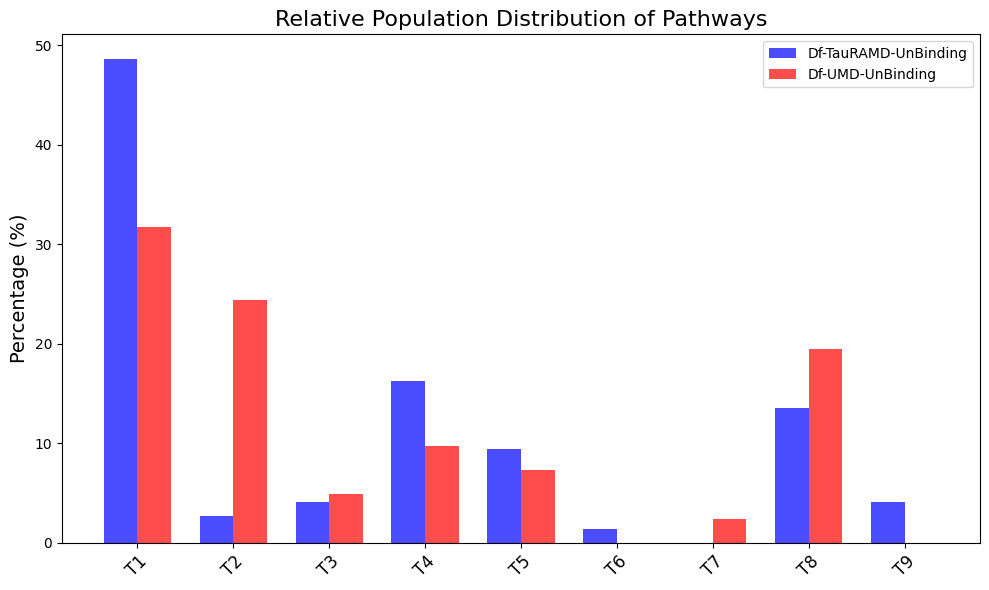

In [9]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Read data from Excel
df_WT = pd.read_excel('DSSP-ExitPoint.xlsx', sheet_name='WT-1kcal-H2')
df_UMD_Unbinding = pd.read_excel('DSSP-ExitPoint.xlsx', sheet_name='Df-UMD-UnBinding')

# Extract frequency counts for pathways
wt_counts = df_WT['Pathway-new'].value_counts().sort_index()
umd_counts = df_UMD_Unbinding['Tunnels-out'].value_counts().sort_index()

# Ensure both categories match (fill missing values with 0)
all_categories = sorted(set(wt_counts.index).union(set(umd_counts.index)))

# Construct contingency table
data_matrix = np.array([[wt_counts.get(cat, 0), umd_counts.get(cat, 0)] for cat in all_categories])

# Convert to DataFrame for better readability
df_contingency = pd.DataFrame(data_matrix, index=all_categories, columns=['WT', 'UMD-UnBinding'])

# Print the original data matrix
print("\nOriginal Contingency Table (Observed Frequencies):\n", df_contingency)

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(data_matrix)

# Convert expected values to DataFrame for clarity
df_expected = pd.DataFrame(expected, index=all_categories, columns=['WT', 'UMD-UnBinding'])

# Print Chi-Square test results
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

# Print expected frequency table
print("\nExpected Frequencies:\n", df_expected)

# Compute **percentages within each dataset** separately
wt_total = data_matrix[:, 0].sum()  # Sum of WT column
umd_total = data_matrix[:, 1].sum()  # Sum of UMD-UnBinding column

wt_percentages = (data_matrix[:, 0] / wt_total) * 100  # WT percentages
umd_percentages = (data_matrix[:, 1] / umd_total) * 100  # UMD percentages

# Convert to DataFrame
df_percentages = pd.DataFrame({'WT (%)': wt_percentages, 'UMD-UnBinding (%)': umd_percentages}, index=all_categories)

# Print population percentages
print("\nPopulation Percentages (Relative to Each Dataset):\n", df_percentages)



# Compute contribution of each cell to the chi-square statistic
chi2_contributions = (data_matrix - expected) ** 2 / expected

# Convert to DataFrame for better readability
df_contributions = pd.DataFrame(chi2_contributions, index=all_categories, columns=['WT', 'UMD-UnBinding'])

# Sum contributions per pathway (row-wise)
df_contributions['Total Contribution'] = df_contributions.sum(axis=1)

# Sort by contribution if desired
df_contributions_sorted = df_contributions.sort_values(by='Total Contribution', ascending=False)

# Print contributions
print("\nChi-Square Contributions per Pathway:\n", df_contributions_sorted)

# Plot bar chart for **percentage relative to each dataset**
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  # Width of bars
x = np.arange(len(all_categories))  # X locations

# Plot bars
ax.bar(x - bar_width / 2, wt_percentages, width=bar_width, label='Df-TauRAMD-UnBinding', color='blue', alpha=0.7)
ax.bar(x + bar_width / 2, umd_percentages, width=bar_width, label='Df-UMD-UnBinding', color='red', alpha=0.7)

# Set labels
ax.set_xticks(x)
ax.set_xticklabels(all_categories, fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=14)
ax.set_title('Relative Population Distribution of Pathways', fontsize=16)
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()
plt.savefig('Df-Tauramd-vs-UMD.png', dpi=300)

## UMD Unbinding vs UMD Binding


Original Contingency Table (Observed Frequencies):
     UMD-Binding  UMD-UnBinding
T1           11             13
T2           20             10
T3            5              2
T4            5              4
T5            0              3
T7            0              1
T8            2              8

Chi-Square Test Results:
Chi2 Statistic: 12.4563
P-value: 0.0525
Degrees of Freedom: 6

Expected Frequencies:
     UMD-Binding  UMD-UnBinding
T1    12.285714      11.714286
T2    15.357143      14.642857
T3     3.583333       3.416667
T4     4.607143       4.392857
T5     1.535714       1.464286
T7     0.511905       0.488095
T8     5.119048       4.880952

Population Percentages (Relative to Each Dataset):
     UMD-Binding (%)  UMD-UnBinding (%)
T1        25.581395          31.707317
T2        46.511628          24.390244
T3        11.627907           4.878049
T4        11.627907           9.756098
T5         0.000000           7.317073
T7         0.000000           2.439024
T8         4.

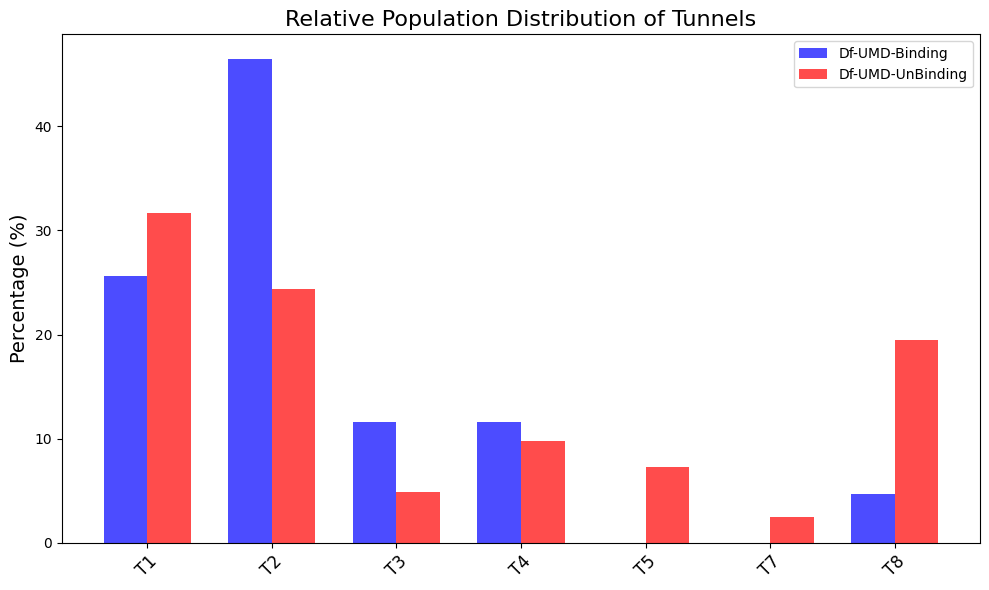

In [10]:

# Read data from Excel
df_UMD_Binding = pd.read_excel('DSSP-ExitPoint.xlsx', sheet_name='Df-UMD-Binding')
df_UMD_Unbinding = pd.read_excel('DSSP-ExitPoint.xlsx', sheet_name='Df-UMD-UnBinding')

# Extract frequency counts for tunnels
UMD_Binding_counts = df_UMD_Binding['Tunnels-in'].value_counts().sort_index()
UMD_UnBinding_counts = df_UMD_Unbinding['Tunnels-out'].value_counts().sort_index()

# Ensure both categories match (fill missing values with 0)
all_categories = sorted(set(UMD_Binding_counts.index).union(set(UMD_UnBinding_counts.index)))

# Construct contingency table
data_matrix = np.array([[UMD_Binding_counts.get(cat, 0), UMD_UnBinding_counts.get(cat, 0)] for cat in all_categories])

# Convert to DataFrame for better readability
df_contingency = pd.DataFrame(data_matrix, index=all_categories, columns=['UMD-Binding', 'UMD-UnBinding'])

# Print the original contingency table
print("\nOriginal Contingency Table (Observed Frequencies):\n", df_contingency)

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(data_matrix)

# Convert expected frequencies to DataFrame
df_expected = pd.DataFrame(expected, index=all_categories, columns=['UMD-Binding', 'UMD-UnBinding'])

# Print Chi-Square test results
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

# Print expected frequency table
print("\nExpected Frequencies:\n", df_expected)

# Compute **percentages within each dataset separately**
UMD_Binding_total = data_matrix[:, 0].sum()  # Sum of UMD-Binding column
UMD_UnBinding_total = data_matrix[:, 1].sum()  # Sum of UMD-UnBinding column

UMD_Binding_percentages = (data_matrix[:, 0] / UMD_Binding_total) * 100  # UMD-Binding percentages
UMD_UnBinding_percentages = (data_matrix[:, 1] / UMD_UnBinding_total) * 100  # UMD-UnBinding percentages

# Convert to DataFrame
df_percentages = pd.DataFrame({'UMD-Binding (%)': UMD_Binding_percentages, 'UMD-UnBinding (%)': UMD_UnBinding_percentages}, index=all_categories)

# Print population percentages
print("\nPopulation Percentages (Relative to Each Dataset):\n", df_percentages)

# Compute contribution of each cell to the chi-square statistic
chi2_contributions = (data_matrix - expected) ** 2 / expected

# Convert to DataFrame for better readability
df_contributions = pd.DataFrame(chi2_contributions, index=all_categories, columns=['UMD-Binding', 'UMD-UnBinding'])

# Sum contributions per pathway (row-wise)
df_contributions['Total Contribution'] = df_contributions.sum(axis=1)

# Sort by contribution if desired
df_contributions_sorted = df_contributions.sort_values(by='Total Contribution', ascending=False)

# Print contributions
print("\nChi-Square Contributions per Pathway:\n", df_contributions_sorted)

# Plot bar chart for **percentage relative to each dataset**
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  # Width of bars
x = np.arange(len(all_categories))  # X locations

# Plot bars
ax.bar(x - bar_width / 2, UMD_Binding_percentages, width=bar_width, label='Df-UMD-Binding', color='blue', alpha=0.7)
ax.bar(x + bar_width / 2, UMD_UnBinding_percentages, width=bar_width, label='Df-UMD-UnBinding', color='red', alpha=0.7)

# Set labels
ax.set_xticks(x)
ax.set_xticklabels(all_categories, fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=14)
ax.set_title('Relative Population Distribution of Tunnels', fontsize=16)
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()
plt.savefig('Df-UMD-Binding-vs-UnBinding.png', dpi=300)
